In [1]:
"""Dataset A"""

'Dataset A'

In [2]:
from Q3 import *


In [3]:
X,Y = load_dataset()
std_slc = StandardScaler()

X = std_slc.fit_transform(X)

dec_tree = tree.DecisionTreeClassifier()

max_depth = list([i for i in range(1,30,1)])

parameters = dict( max_depth=max_depth)

clf_GS = MyGridSearchCV(dec_tree, parameters)
clf_GS.fit(X, Y)

(4200, 784) (4200, 10)
The class frequencies are : 
The frequency of class 0 is 400.0 / 4200
The frequency of class 1 is 494.0 / 4200
The frequency of class 2 is 393.0 / 4200
The frequency of class 3 is 424.0 / 4200
The frequency of class 4 is 416.0 / 4200
The frequency of class 5 is 398.0 / 4200
The frequency of class 6 is 441.0 / 4200
The frequency of class 7 is 431.0 / 4200
The frequency of class 8 is 410.0 / 4200
The frequency of class 9 is 393.0 / 4200
Current parameters :  {'max_depth': 1}
Best validation score achieved :  0.21666666666666667  Average validation score achieved :  0.2045238095238095 

Current parameters :  {'max_depth': 2}
Best validation score achieved :  0.36428571428571427  Average validation score achieved :  0.3280952380952381 

Current parameters :  {'max_depth': 3}
Best validation score achieved :  0.49047619047619045  Average validation score achieved :  0.42428571428571427 

Current parameters :  {'max_depth': 4}
Best validation score achieved :  0.590476

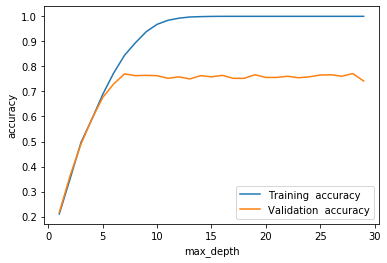

In [5]:
import matplotlib.pyplot as plt 
plt.plot([x for x in range(1,30,1)], clf_GS.training_accuracy_history, label = "Training  accuracy " )
plt.plot([x for x in range(1,30,1)], clf_GS.validation_accuracy_history, label = "Validation  accuracy")
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
plt.show()